In [1]:
library(brms) #predictability: Double hierearchical model
library(MCMCglmm) #HPDinterval
library(dplyr) #%>%
library(lmerTest) #lmer
#library(MuMIn) #r2
#library(merTools) #sim

Warning message:
"le package 'brms' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attachement du package : 'brms'


L'objet suivant est masqué depuis 'package:stats':

    ar


Warning message:
"le package 'MCMCglmm' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Matrix

Warning message:
"le package 'Matrix' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : coda

Warning message:
"le package 'coda' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : ape

Warning message:
"le package 'ape' a été compilé avec la version R 4.1.2"

Attachement du package : 'MCMCglmm'


L'objet suivant est masqué depuis 'pac

In [19]:
library(parallel)
my.cores = detectCores()-1 #minus 1 to avoid bocking the computer
my.cores

[1] 11

In [20]:
#df[rowSums(is.na(df)) > 0,]

# Behaviorual syndrome

,TRAN
OFH,0
TRAN,1


,OFH
TRAN,0
OFH,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


[1] 4966   30


        level           DOA             DIB                FoodPenID   
 2021-01-11: 156   Min.   :179.0   Min.   : 61.0   FoodPenID1-4 :1182  
 2021-01-17: 156   1st Qu.:222.0   1st Qu.:104.0   FoodPenID5-8 :1246  
 2021-04-18: 156   Median :279.0   Median :161.0   FoodPenID9-12:2538  
 2021-01-24: 155   Mean   :283.4   Mean   :165.4                       
 2021-05-23: 155   3rd Qu.:338.0   3rd Qu.:220.0                       
 2021-01-05: 154   Max.   :410.0   Max.   :292.0                       
 (Other)   :4034                                                       
   BS_type          Treatment           CLASS          PenID     
 Length:4966        TRAN:2491   LEXP       : 894   pen5   : 659  
 Class :character   OFH :2475   MEXP       :1140   pen11  : 648  
 Mode  :character               NewAfterEpi:1513   pen10  : 647  
                                REXP       :1419   pen4   : 646  
                                                   pen9   : 632  
                            

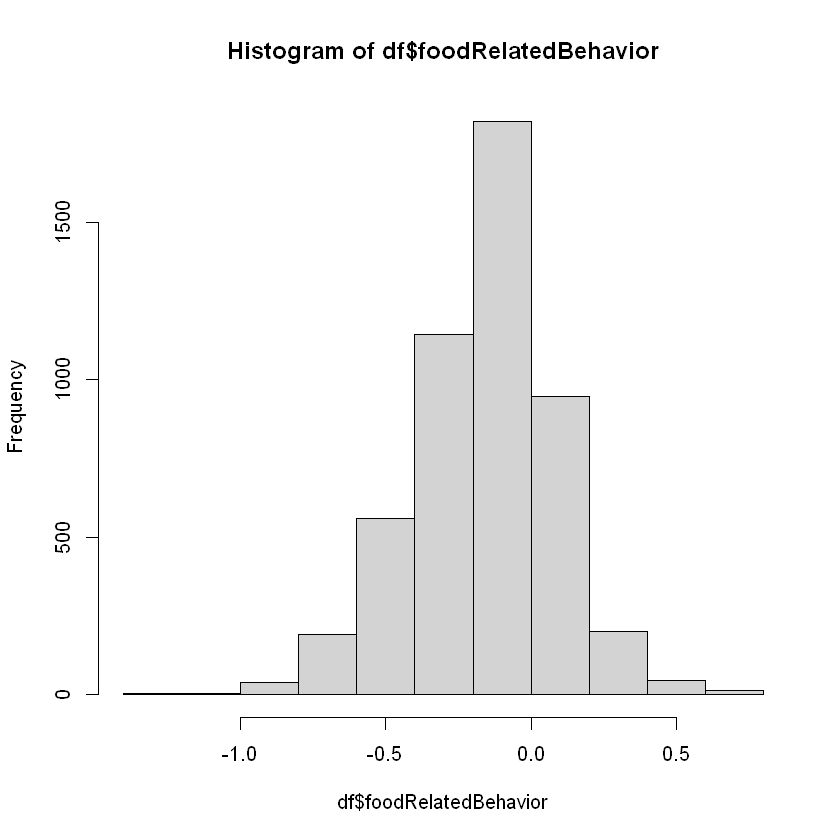

[1] 4966   44

[1] 3143   44

[1] 457  44

[1] 444  44

[1] 463  44

[1] 459  44

[1] 603  44

,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,HenID_WIB,...,latency_1_Zone_15mn_3h,latency_1_Zone_15mn_3hOPP,latency_1_Zone_15mn_3h_bind,size,VTD,KBFInterp,weightInterp,SleepingNotUppest,foodRelatedBehavior,mid_cum_Z4_sec_Morning_sqrt
,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,...,<int>,<int>,"<int[,2]>",<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,2020-12-20,200,82,FoodPenID9-12,time,TRAN,REXP,pen10,5.5000000,hen_131-WIB12,...,12,0,"12, 0",12,5.288128,0.000000,1802.650,0,-0.5363137,2.141715
7,2021-01-03,214,96,FoodPenID9-12,time,TRAN,REXP,pen10,0.8333333,hen_131-WIB14,...,9,3,"9, 3",12,7.312166,0.000000,1839.283,0,-0.2227852,1.971181
10,2021-01-17,228,110,FoodPenID9-12,time,TRAN,REXP,pen10,1.8333333,hen_131-WIB16,...,12,0,"12, 0",12,6.392746,5.571429,1850.211,0,-0.3149193,2.296193


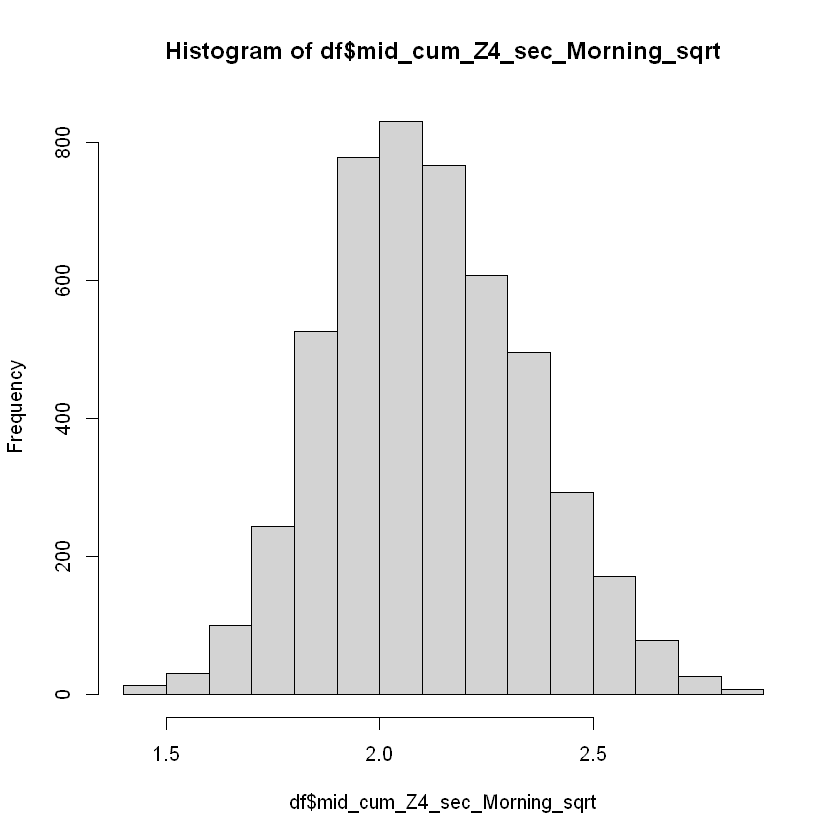

In [21]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'df_BS.csv'), header = TRUE, sep = ",")

df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$level = as.factor(df$level) 
df$FoodPenID = as.factor(df$FoodPenID) 

#df$WOA_F = as.factor(df$WOA) 

df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment)

#scale: mean-centering of the environmental variable so that intercepts reflect average values for the HenID and ind. 
#df$temperature_C_avg_scale = scale(df$temperature_C_avg, center=TRUE, scale=TRUE)

#setting reference group
contrasts(df$Treatment)
df <- df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
contrasts(df$Treatment)

contrasts(df$CLASS)
df <- df %>% mutate(CLASS = relevel(CLASS, ref = "LEXP"))
contrasts(df$CLASS)
print(dim(df))
summary(df)

df$latency_1_Zone_mn_6hOPP = max(df$latency_1_Zone_mn_6h)-df$latency_1_Zone_mn_6h
df$food_related_behavior_final_inv_cst = (-1)*(df$food_related_behavior_final)+1.01
df$latency_1_Zone_15mn_6h = as.integer(df$latency_1_Zone_mn_6h/15)
df$latency_1_Zone_15mn_6hOPP = max(df$latency_1_Zone_15mn_6h) - df$latency_1_Zone_15mn_6h

df$latency_1_Zone_15mn_3h = as.integer(df$latency_1_Zone_mn_3h/15)
df$latency_1_Zone_15mn_3hOPP = max(df$latency_1_Zone_15mn_3h) - df$latency_1_Zone_15mn_3h
df$latency_1_Zone_15mn_3h_bind = with(df, cbind(latency_1_Zone_15mn_3h, latency_1_Zone_15mn_3hOPP))
df$size = with(df, latency_1_Zone_15mn_3h + latency_1_Zone_15mn_3hOPP)


#Parameter names should not contain dots or underscores.
df$VTD = df$vertical_travel_distance_fulllight_perinsideh
df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp
df$SleepingNotUppest = df$Sleeping_NotUppest

#Parameter names should not contain dots or underscores.
df$VTD = df$vertical_travel_distance_fulllight_perinsideh
df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp
df$SleepingNotUppest = df$Sleeping_NotUppest
df$foodRelatedBehavior = log(df$food_related_behavior_final_inv_cst)
hist(df$foodRelatedBehavior)
df$mid_cum_Z4_sec_Morning_sqrt = sqrt(df$mid_cum_Z4_sec_Morning)
hist(df$mid_cum_Z4_sec_Morning_sqrt)

dim(df)
df_time = df[df$BS_type=='time',]
dim(df_time)

df_LP2 = df[df$BS_type=='LP2',]
dim(df_LP2)

df_LP10 = df[df$BS_type=='LP10',]
dim(df_LP10)

df_cold = df[df$BS_type=='cold',]
dim(df_cold)

df_vacc = df[df$BS_type=='TypicalVaccinationDay',]
dim(df_vacc)

df_AC = df[df$across_context==1,]
dim(df_AC)

head(df_time,3)

In [29]:
head(df_time,3)

,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,HenID_WIB,...,latency_1_Zone_15mn_3h,latency_1_Zone_15mn_3hOPP,latency_1_Zone_15mn_3h_bind,size,VTD,KBFInterp,weightInterp,SleepingNotUppest,foodRelatedBehavior,mid_cum_Z4_sec_Morning_sqrt
,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,...,<int>,<int>,"<int[,2]>",<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,2020-12-20,200,82,FoodPenID9-12,time,TRAN,REXP,pen10,5.5000000,hen_131-WIB12,...,12,0,"12, 0",12,5.288128,0.000000,1802.650,0,-0.5363137,2.141715
7,2021-01-03,214,96,FoodPenID9-12,time,TRAN,REXP,pen10,0.8333333,hen_131-WIB14,...,9,3,"9, 3",12,7.312166,0.000000,1839.283,0,-0.2227852,1.971181
10,2021-01-17,228,110,FoodPenID9-12,time,TRAN,REXP,pen10,1.8333333,hen_131-WIB16,...,12,0,"12, 0",12,6.392746,5.571429,1850.211,0,-0.3149193,2.296193


# Multivariate models with correlated multilevel structure

#Get information on all parameters (and parameter classes) for which priors may be specified including default priors:
get_prior(formula = scale(food_related_behavior_final_inv_cst) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID), 
          data=df_time, family = gaussian())

#Get information on all parameters (and parameter classes) for which priors may be specified including default priors:
get_prior(formula = Sleeping_NotUppest ~ Treatment + scale(weight_interp)+scale(KBF_interp) + (1|a|HenID), 
          data=df_time, family = bernoulli())

In [30]:
#not scaling, keeping most possible original scale
FA = bf(food_related_behavior_final_inv_cst ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID),
       family=Gamma(link='log'))
VTD = bf(scale(VTD) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB)+scale(I(DIB^2)) +(1|a|HenID),
        family=gaussian)
TM = bf(mid_cum_Z4_sec_Morning ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1|a|HenID),
       family=Gamma(link='log'))
SD = bf(Sleeping_NotUppest ~ Treatment + scale(weight_interp)+scale(KBF_interp) + (1|a|HenID), 
        family = bernoulli()) 
WG = bf(latency_1_Zone_15mn_3h_bind | trials(size) ~ Treatment +scale(DIB)+scale(weight_interp)+scale(KBF_interp)+(1|a|HenID), 
        family = multinomial()) 
Multi_DHGLM = brm(FA + VTD + TM + SD + WG +
                   set_rescor(FALSE),
                    data = df_time,
                    iter = 20000, warmup = 15000, thin = 4,
                    chains = 4, cores =my.cores, seed = 12345
                    )

summary(Multi_DHGLM)

Compiling Stan program...

Start sampling



 Family: MV(gamma, gaussian, gamma, bernoulli, multinomial) 
  Links: mu = log; shape = identity
         mu = identity; sigma = identity
         mu = log; shape = identity
         mu = logit
         mulatency1Zone15mn3hOPP = logit 
Formula: food_related_behavior_final_inv_cst ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         scale(VTD) ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + scale(I(DIB^2)) + (1 | a | HenID) 
         mid_cum_Z4_sec_Morning ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         Sleeping_NotUppest ~ Treatment + scale(weight_interp) + scale(KBF_interp) + (1 | a | HenID) 
         latency_1_Zone_15mn_3h_bind | trials(size) ~ Treatment + scale(DIB) + scale(weight_interp) + scale(KBF_interp) + (1 | a | HenID) 
   Data: df_time (Number of observations: 3143) 
  Draws: 4 chains, each with iter = 2500; warmup = 1500; thin = 4;
         total post-warmu

Warning message:
"
1492 (47.5%) p_waic estimates greater than 0.4. We recommend trying loo instead."
Warning message:
"Found 70 observations with a pareto_k > 0.7 in model 'Multi_DHGLM'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "


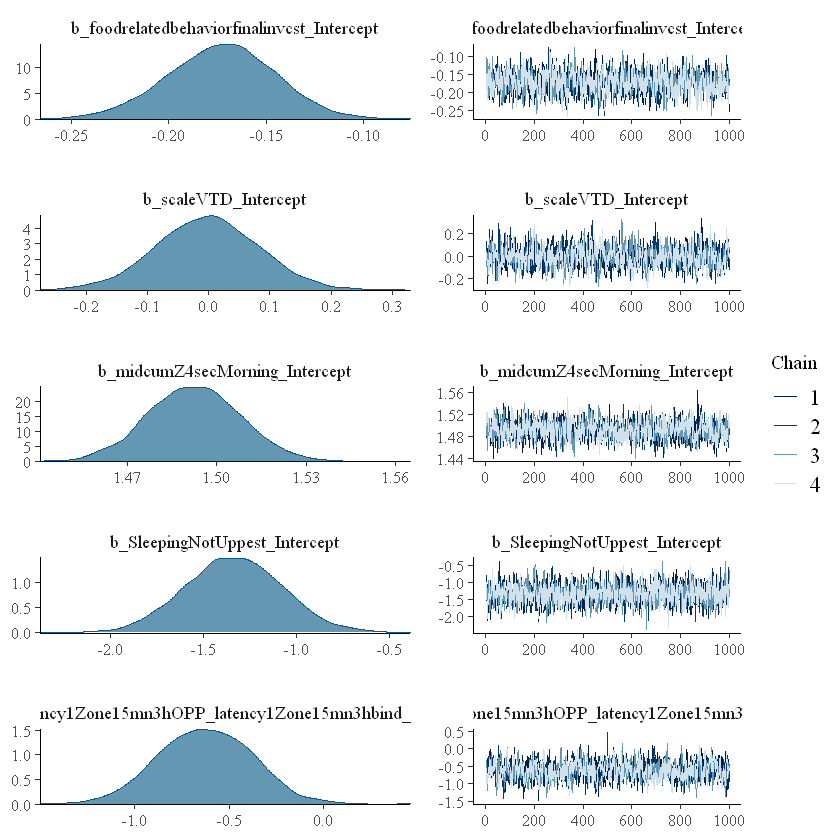

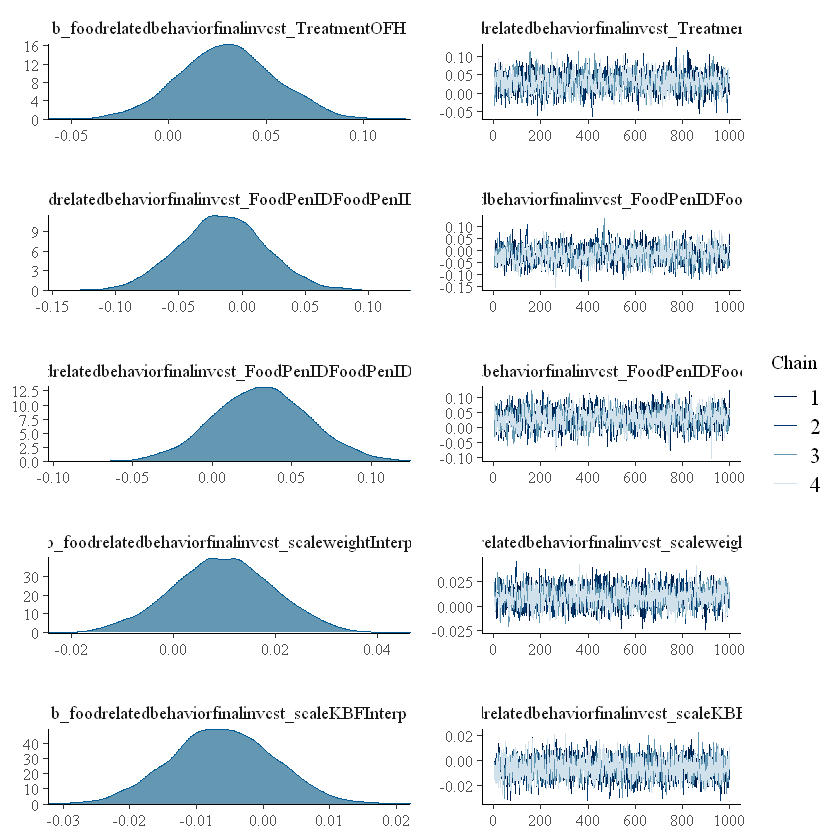

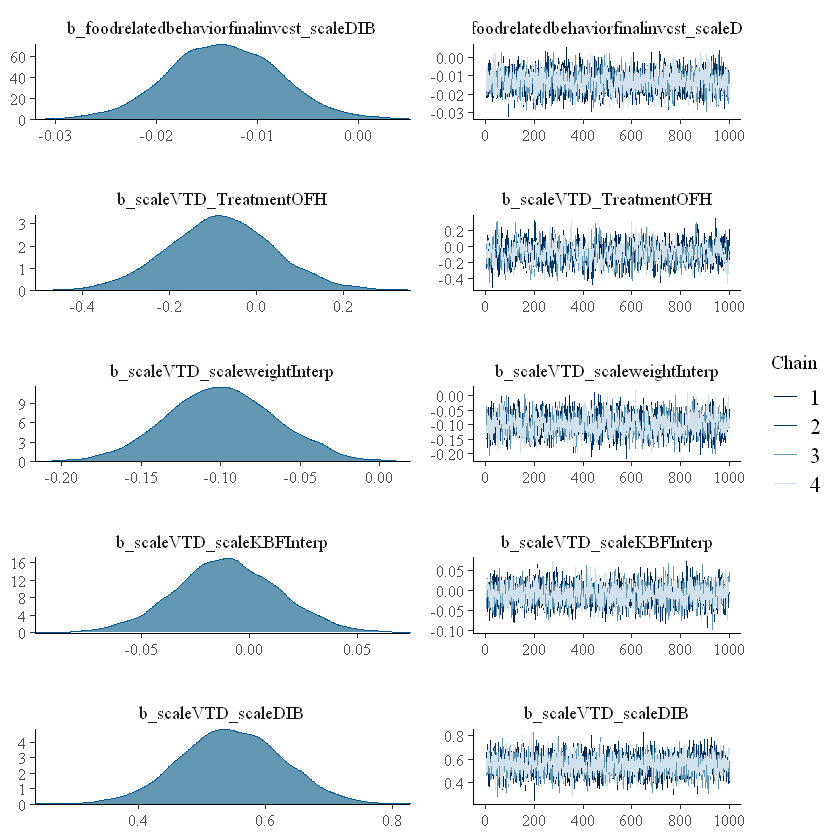

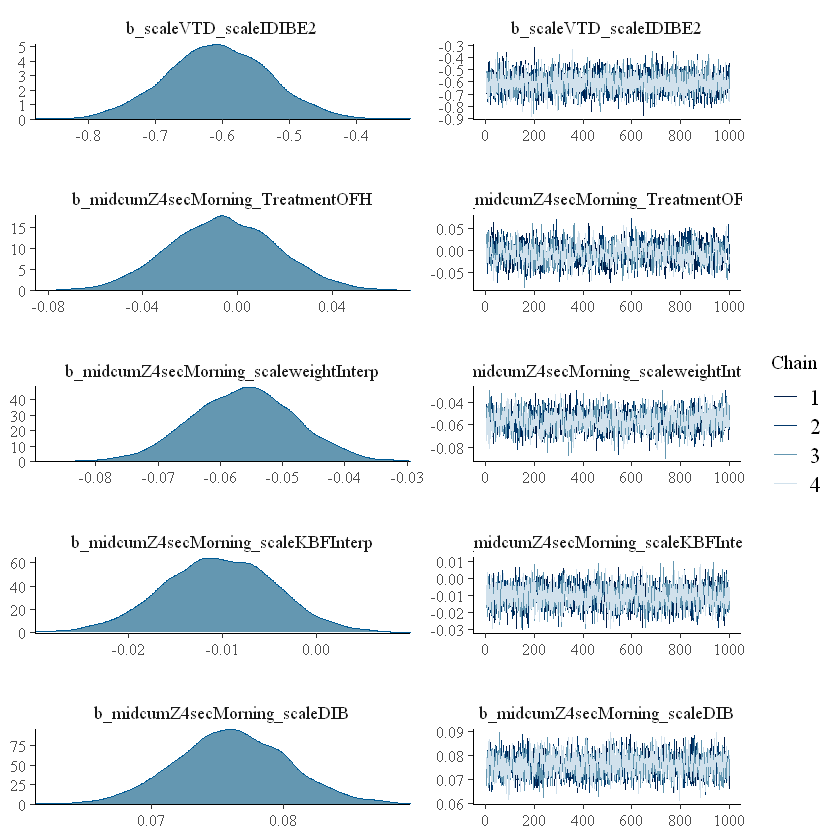

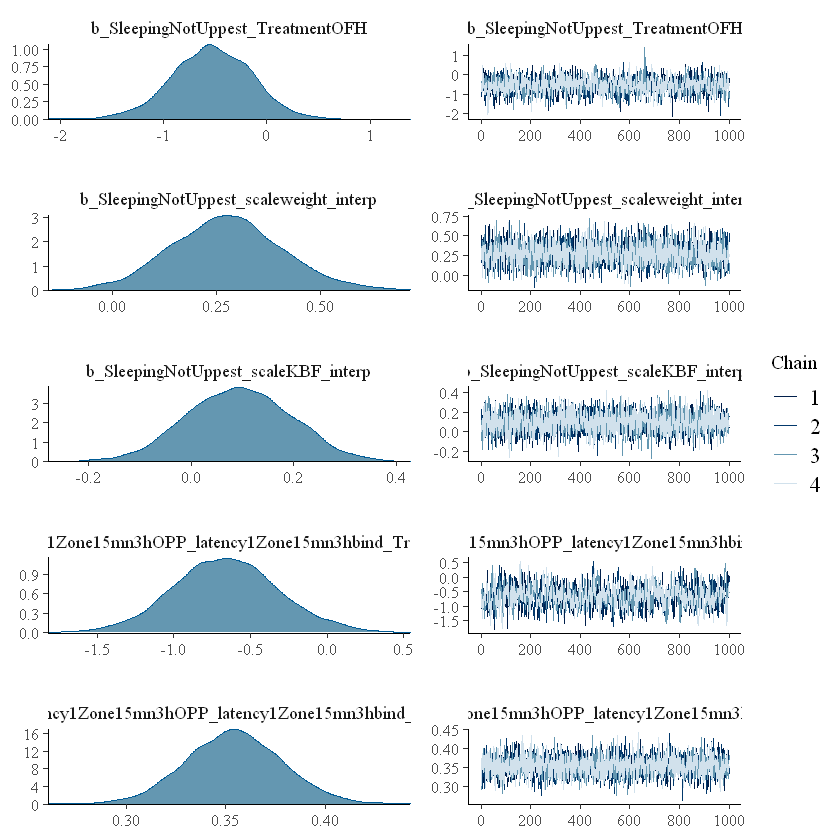

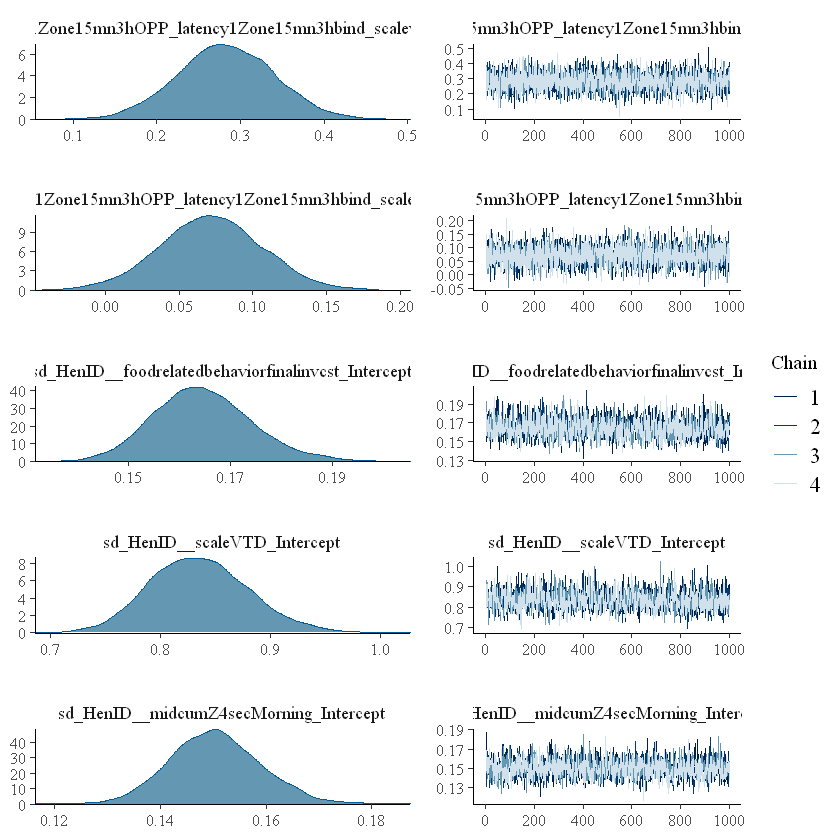

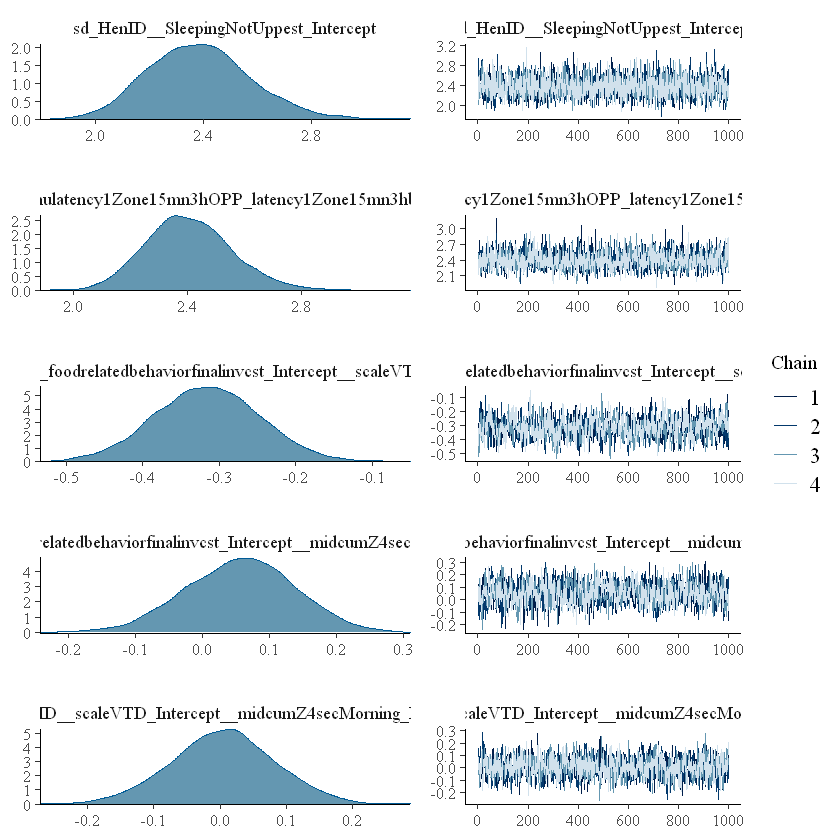

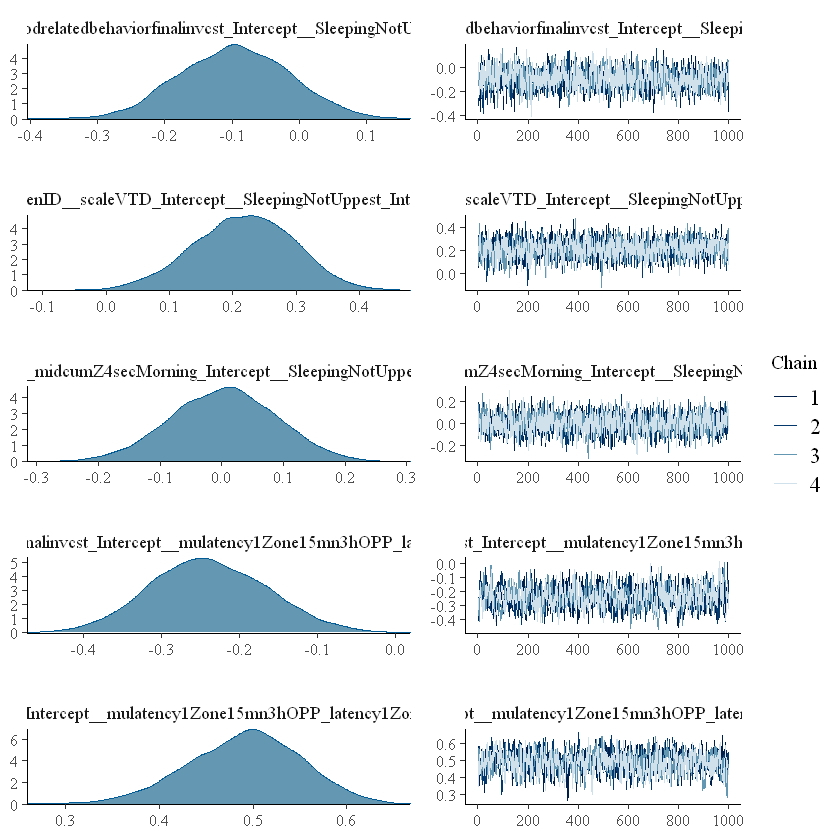

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


[1] "b_foodrelatedbehaviorfinalinvcst_Intercept"                         
 [2] "b_scaleVTD_Intercept"                                               
 [3] "b_midcumZ4secMorning_Intercept"                                     
 [4] "b_SleepingNotUppest_Intercept"                                      
 [5] "b_mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_Intercept"         
 [6] "b_foodrelatedbehaviorfinalinvcst_TreatmentOFH"                      
 [7] "b_foodrelatedbehaviorfinalinvcst_FoodPenIDFoodPenID5M8"             
 [8] "b_foodrelatedbehaviorfinalinvcst_FoodPenIDFoodPenID9M12"            
 [9] "b_foodrelatedbehaviorfinalinvcst_scaleweightInterp"                 
[10] "b_foodrelatedbehaviorfinalinvcst_scaleKBFInterp"                    
[11] "b_foodrelatedbehaviorfinalinvcst_scaleDIB"                          
[12] "b_scaleVTD_TreatmentOFH"                                            
[13] "b_scaleVTD_scaleweightInterp"                                       
[14] "b_scaleVTD_scaleKBFInterp"                                          
[15] "b_scaleVTD_scaleDIB"                                                
[16] "b_scaleVTD_scaleIDIBE2"                                             
[17] "b_midcumZ4secMorning_TreatmentOFH"                                  
[18] "b_midcumZ4secMorning_scaleweightInterp"                             
[19] "b_midcumZ4secMorning_scaleKBFInterp"                                
[20] "b_midcumZ4secMorning_scaleDIB"                                      
[21] "b_SleepingNotUppest_TreatmentOFH"                                   
[22] "b_SleepingNotUppest_scaleweight_interp"                             
[23] "b_SleepingNotUppest_scaleKBF_interp"                                
[24] "b_mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_TreatmentOFH"      
[25] "b_mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_scaleDIB"          
[26] "b_mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_scaleweight_interp"
[27] "b_mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_scaleKBF_interp"   
[28] "sd_HenID__foodrelatedbehaviorfinalinvcst_Intercept"                 
[29] "sd_HenID__scaleVTD_Intercept"                                       
[30] "sd_HenID__midcumZ4secMorning_Intercept"

prior,class,coef,group,resp,dpar,nlpar,bound,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,foodrelatedbehaviorfinalinvcst,,,,default
,b,FoodPenIDFoodPenID5M8,,foodrelatedbehaviorfinalinvcst,,,,default
,b,FoodPenIDFoodPenID9M12,,foodrelatedbehaviorfinalinvcst,,,,default
,b,scaleDIB,,foodrelatedbehaviorfinalinvcst,,,,default
,b,scaleKBFInterp,,foodrelatedbehaviorfinalinvcst,,,,default
,b,scaleweightInterp,,foodrelatedbehaviorfinalinvcst,,,,default
,b,TreatmentOFH,,foodrelatedbehaviorfinalinvcst,,,,default
,b,,,latency1Zone15mn3hbind,mulatency1Zone15mn3hOPP,,,default
,b,scaleDIB,,latency1Zone15mn3hbind,mulatency1Zone15mn3hOPP,,,default


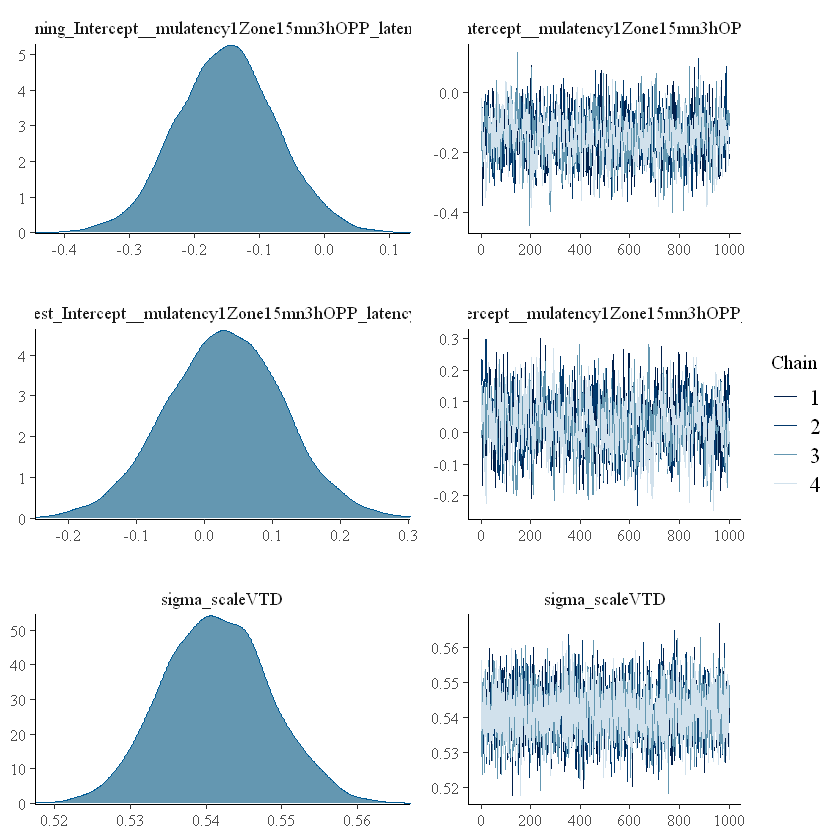

In [33]:
Multi_DHGLM = add_criterion(Multi_DHGLM, criterion=c('waic','loo'), file=file.path(path_,'RMS_BS_pred_allvar_moreit'))
#pairs(Multi_DHGLM)
plot(Multi_DHGLM)
#head(get_variables(modelPred),10)

prior_summary(Multi_DHGLM)

#coefficient of variation in predictability” (CVP)
#log.norm.res = exp(posterior_samples(Multi_DHGLM)$"sd_HenID__sigma_Intercept"^2)
#CVP = sqrt(log.norm.res-1)
#mean(CVP);HPDinterval(as.mcmc(CVP),0.95)

#save model (from: https://bookdown.org/ajkurz/Statistical_Rethinking_recoded/horoscopes-insights.html#save-your-model-fits)
save(Multi_DHGLM, file = "Multi_DHGLM_allvar_moreit.rda")
#load("Multi_DHGLM_allvar.rda") #do not put modelreload = load("Multi_DHGLM_allvar.rda")

#all data, sd in python
#extract samples (draw) from the posterior distribution, including all variables
#df_pred = posterior_samples(modelPred) #depreciated but still work well. we will instead use:
colnames(posterior_samples(Multi_DHGLM))[1:30]
df_pred = as_draws(Multi_DHGLM)
write.csv(df_pred, file.path(path_,'BRMS_BS_pred_allvar_moreit.csv'), row.names = FALSE)

#only meand and CI from R
df_pred = posterior_samples(Multi_DHGLM)
dim(df_pred)
df_mean = colMeans(df_pred)
df_CI = HPDinterval(as.mcmc(df_pred))
write.csv(df_CI, file.path(path_,'df_CI_BRMS_BS_pred_allvar_moreit.csv'), row.names = FALSE)
write.csv(df_mean, file.path(path_,'df_mean_BRMS_BS_pred_allvar_moreit.csv'), row.names = FALSE)

,Estimate,Est.Error,Q2.5,Q97.5
foodrelatedbehaviorfinalinvcst_Intercept,-0.172937892,0.027849419,-0.228865174,-0.119711989
scaleVTD_Intercept,-0.001628548,0.085525189,-0.171847904,0.168583774
midcumZ4secMorning_Intercept,1.492448088,0.015593137,1.461636333,1.523092614
SleepingNotUppest_Intercept,-1.335805914,0.262426934,-1.847543050,-0.814642081
mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_Intercept,-0.625432438,0.247697032,-1.113295402,-0.150152795
foodrelatedbehaviorfinalinvcst_TreatmentOFH,0.030088514,0.025012064,-0.018688122,0.078806942
foodrelatedbehaviorfinalinvcst_FoodPenIDFoodPenID5M8,-0.015624493,0.034242702,-0.082237078,0.051208399
foodrelatedbehaviorfinalinvcst_FoodPenIDFoodPenID9M12,0.030887967,0.030020747,-0.028284491,0.089956400
foodrelatedbehaviorfinalinvcst_scaleweightInterp,0.009709979,0.009854587,-0.009989388,0.028947634
foodrelatedbehaviorfinalinvcst_scaleKBFInterp,-0.006132982,0.007770848,-0.021140587,0.008794137


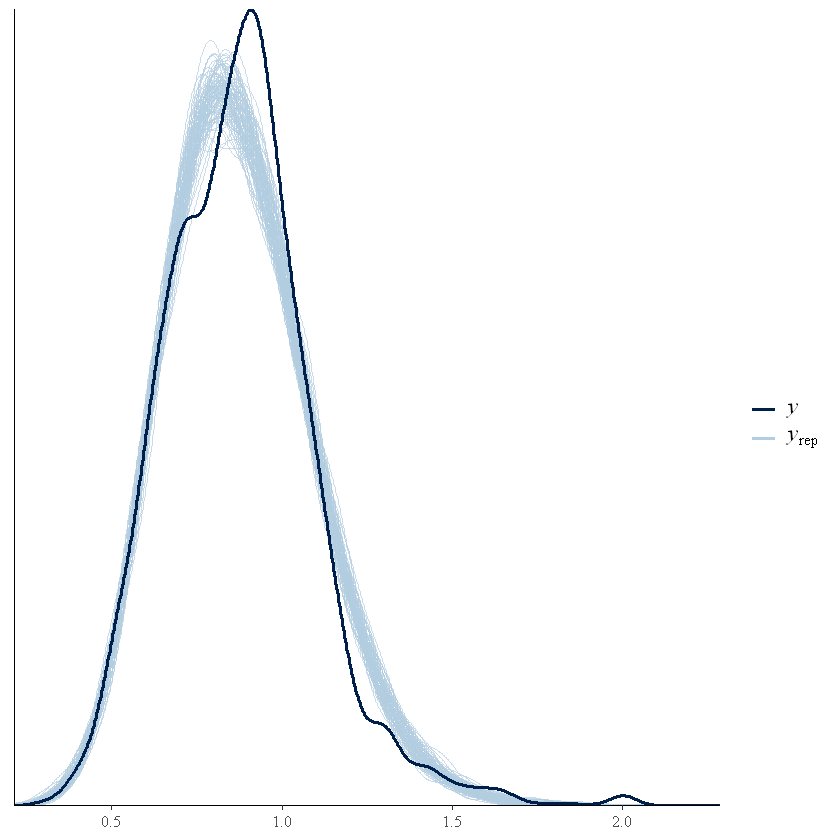

In [40]:
#mean population-level 
fixef(Multi_DHGLM)

#posterior predictive check
pp_check(Multi_DHGLM, resp='foodrelatedbehaviorfinalinvcst',ndraws = 100)
#-->we don't see any major systematic discrepancies of our data from what can be predicted with modelPred

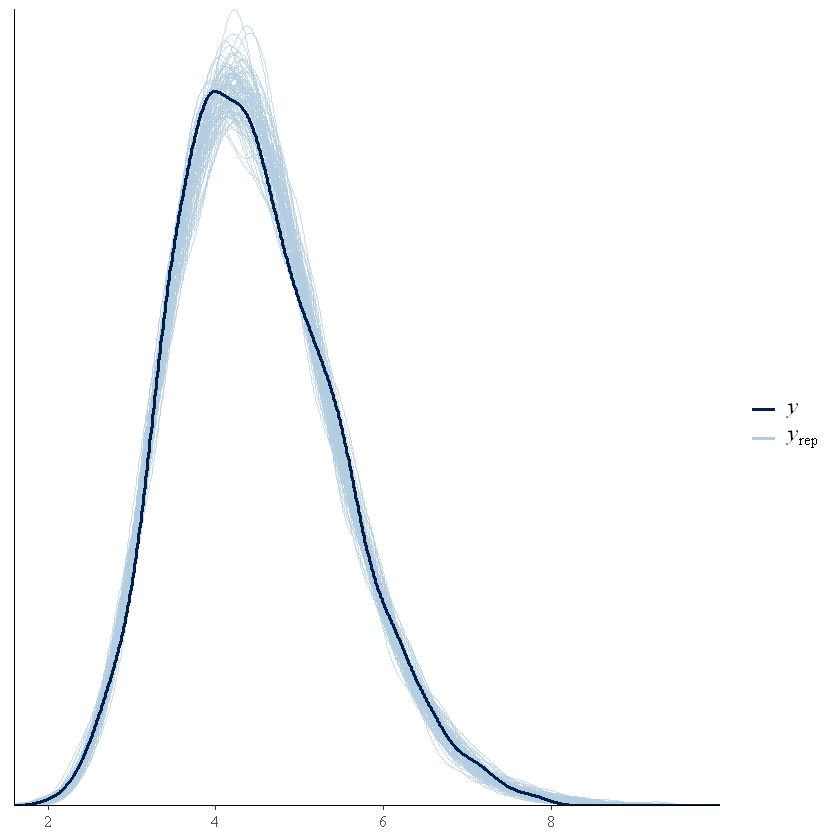

In [41]:
pp_check(Multi_DHGLM, resp='midcumZ4secMorning',ndraws = 100)

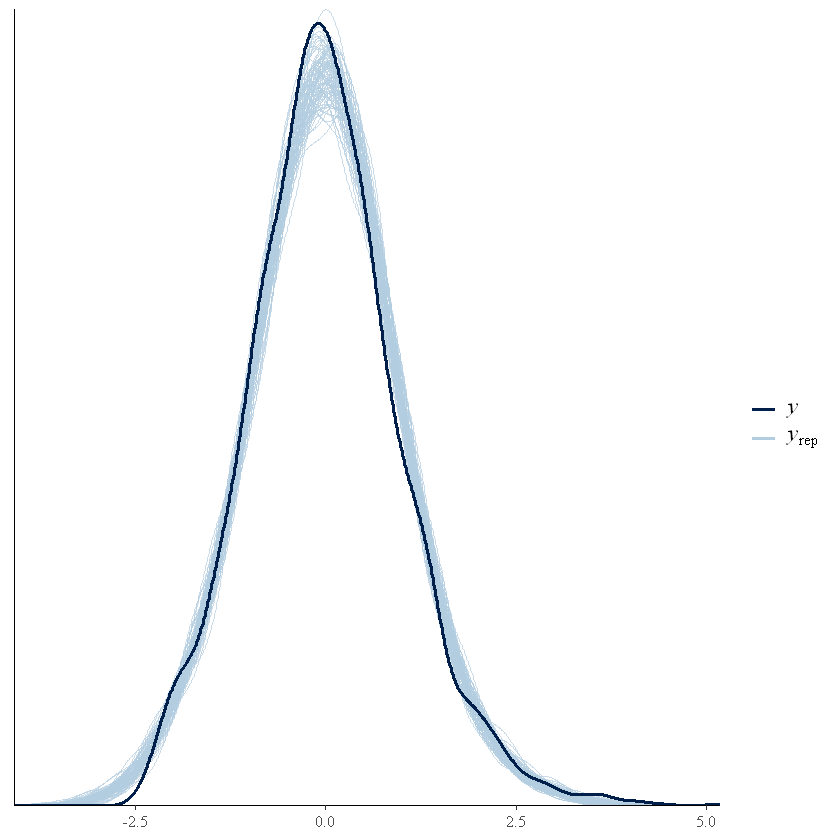

In [45]:
pp_check(Multi_DHGLM, resp='scaleVTD',ndraws = 100)

In [44]:
#pp_check(Multi_DHGLM, resp='latency1Zone15mn3hbind',ndraws = 100) #'pp_check' is not implemented for this family.

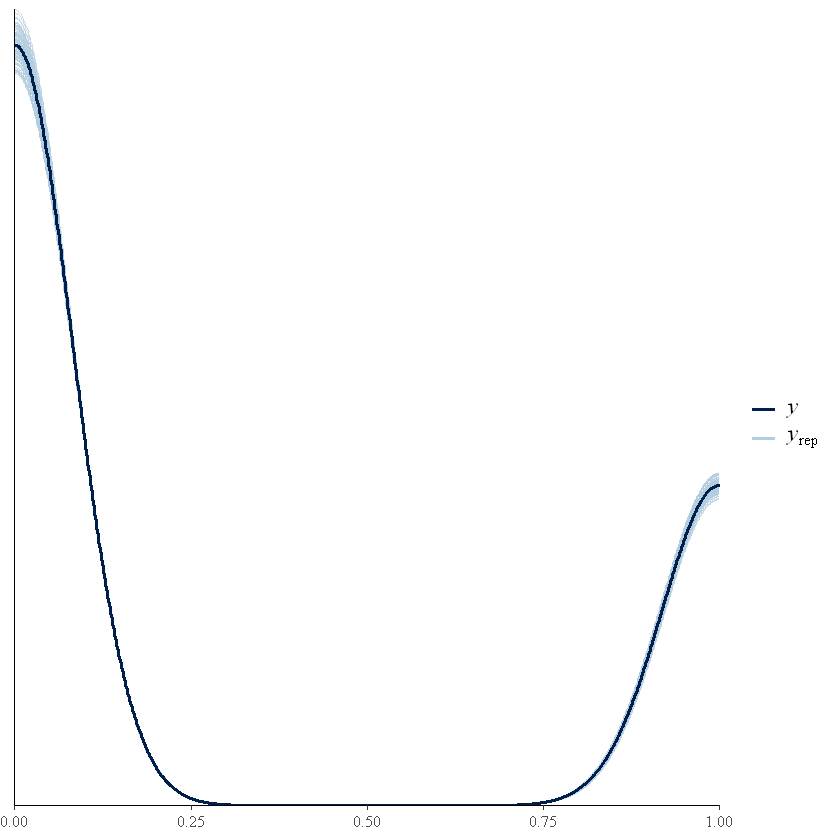

In [46]:
pp_check(Multi_DHGLM, resp='SleepingNotUppest',ndraws = 100)

In [47]:
print(Multi_DHGLM$criteria$waic)
#approximative leave-one-out cross validation
print(Multi_DHGLM$criteria$loo)


Computed from 4000 by 3143 log-likelihood matrix

          Estimate    SE
elpd_waic -19907.9 294.8
p_waic      1980.7  47.0
waic       39815.7 589.6

1492 (47.5%) p_waic estimates greater than 0.4. We recommend trying loo instead. 

Computed from 4000 by 3143 log-likelihood matrix

         Estimate    SE
elpd_loo -19919.3 294.8
p_loo      1992.1  47.1
looic     39838.5 589.6
------
Monte Carlo SE of elpd_loo is NA.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     2904  92.4%   237       
 (0.5, 0.7]   (ok)        169   5.4%   72        
   (0.7, 1]   (bad)        57   1.8%   11        
   (1, Inf)   (very bad)   13   0.4%   4         
See help('pareto-k-diagnostic') for details.


In [4]:
load("Multi_DHGLM_allvar.rda")

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


,lower,upper
var1,-0.4478127,-0.1803272


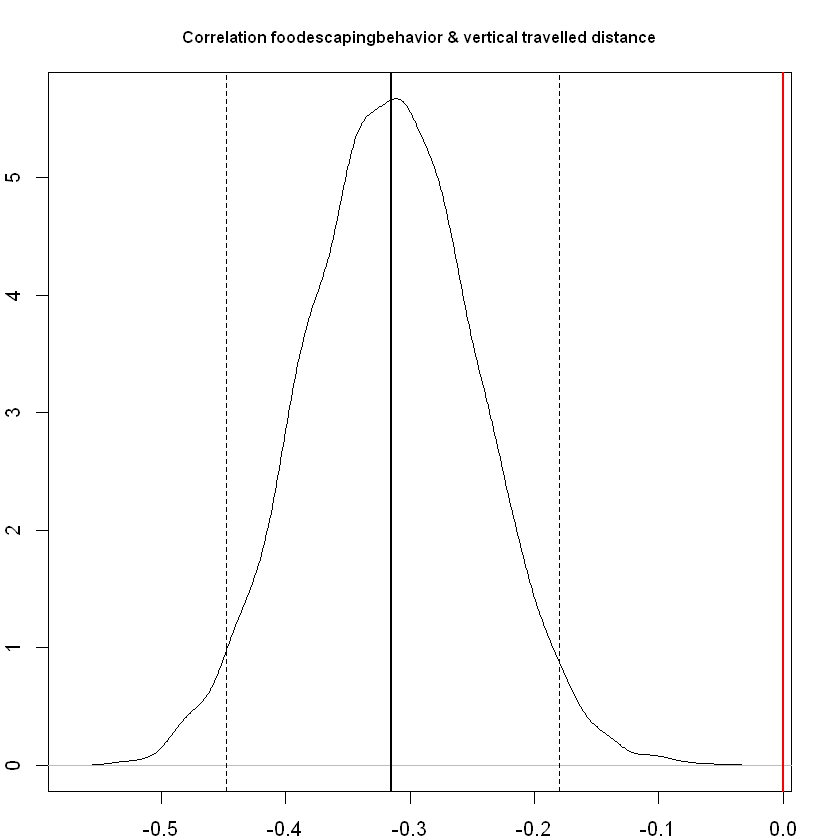

In [18]:
#colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation foodescapingbehavior & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


,lower,upper
var1,-0.3924011,-0.1011844


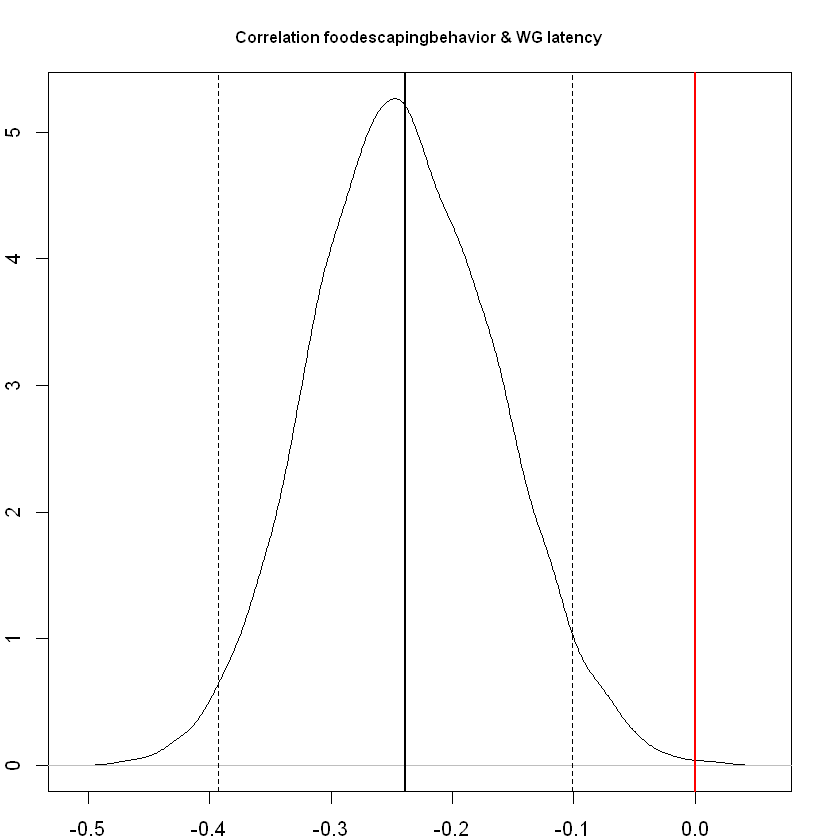

In [19]:
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT<-posterior_samples(Multi_DHGLM)[,'cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation foodescapingbehavior & WG latency",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


,lower,upper
var1,0.06564941,0.3720336


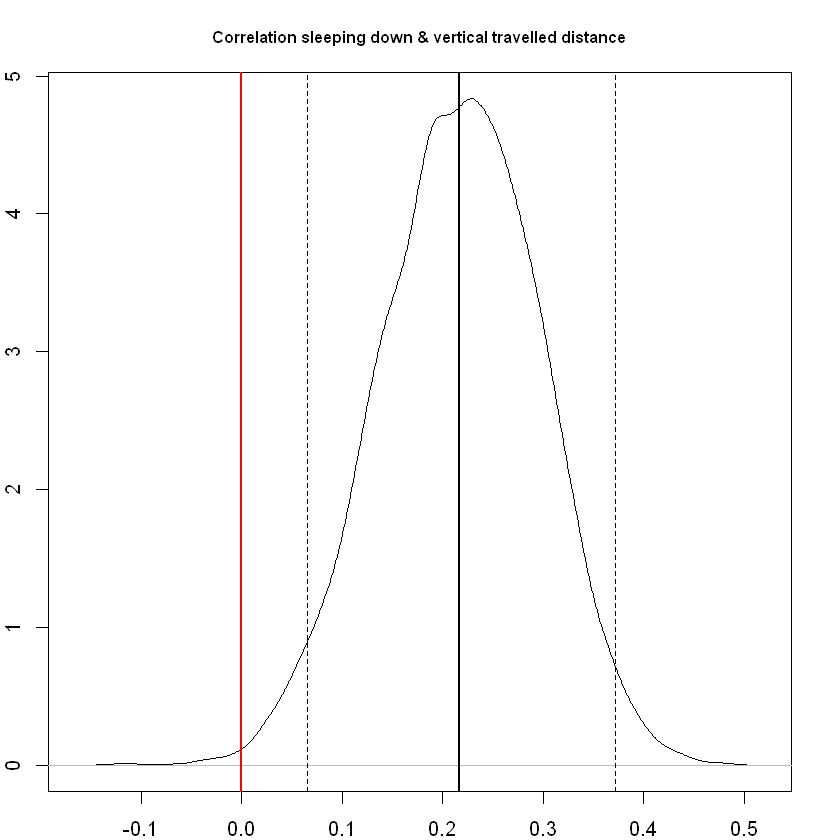

In [20]:
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT<-posterior_samples(Multi_DHGLM)[,'cor_HenID__scaleVTD_Intercept__SleepingNotUppest_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation sleeping down & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


,lower,upper
var1,0.3717381,0.6024528


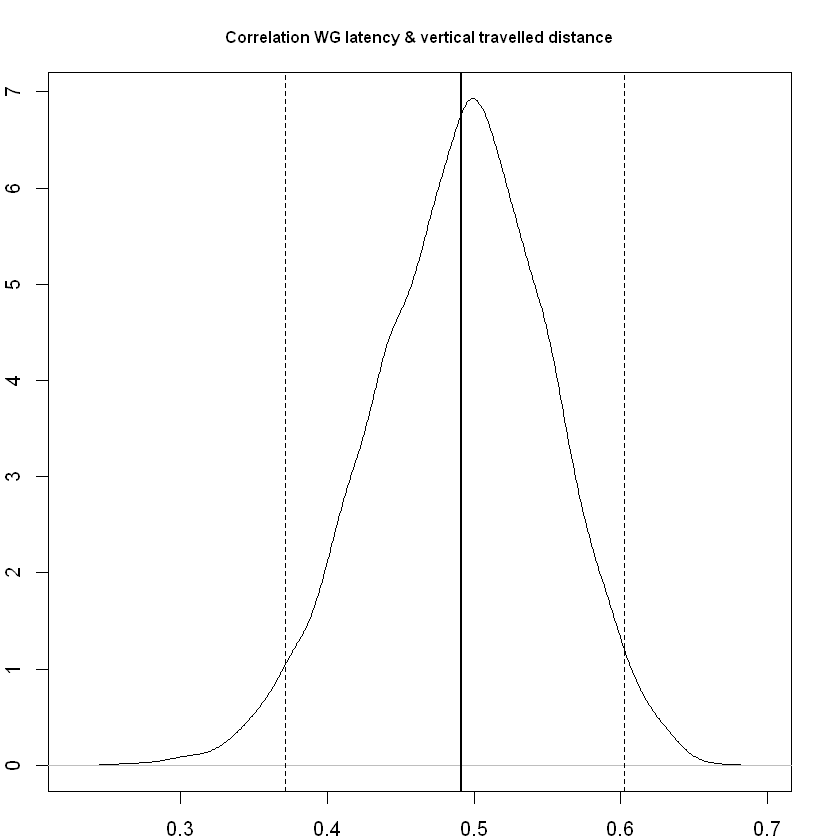

In [21]:
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT<-posterior_samples(Multi_DHGLM)[,'cor_HenID__scaleVTD_Intercept__mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation WG latency & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

# scaled behavior

#scaling and gaussian
FA = bf(scale(foodRelatedBehavior) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID),
       family=gaussian)
VTD = bf(scale(VTD) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB)+scale(I(DIB^2)) +(1|a|HenID),
        family=gaussian)
TM = bf(scale(mid_cum_Z4_sec_Morning_sqrt) ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1|a|HenID),
       family=gaussian)
SD = bf(Sleeping_NotUppest ~ Treatment + scale(weight_interp)+scale(KBF_interp) + (1|a|HenID), 
        family = bernoulli()) 
WG = bf(latency_1_Zone_15mn_3h_bind | trials(size)  ~ Treatment +scale(DIB)+scale(weight_interp)+scale(KBF_interp)+(1|a|HenID), 
        family = multinomial()) 
Multi_DHGLM_scaling <- brm(FA + VTD + TM + SD + WG +
                   set_rescor(FALSE),
                    data = df_time,
                    iter = 10000, warmup = 6000, thin = 4,
                    chains = 4, cores =my.cores, seed = 12345
                    )

summary(Multi_DHGLM_scaling)